# Part I - Communicate Data Findings
## by Otiengo Philip

## Introduction
This data set, 'prosperLoanData.csv' from prosper.com contains 81 variables on loans and 113,937 entries.Some of the variables include loan amount, borrower rate, the loan  status, monthly borrower income, borrower employment status, payment information and much more.

The main objective to conduct exploratory data analysis and explanatory data analysis on the main feature of interest among the 81 variables and investigate the relationships with the other variables of interests and finally communicate my findings through data visualizations.



## Preliminary Wrangling


In [56]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:
# load dataset
df = pd.read_csv('prosperLoanData.csv')

df

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
0                C    36               Completed  2009-08-14 00:00:00   
1              NaN    36                 Current                  NaN   
2               HR    36               Completed  2009-12-17 00:00:00   
3              NaN    36                 Current                  NaN   
4              NaN    36                 Current                  NaN   
...            ...   ...                     ...                  ...   
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_ServiceFees  \
0           0.16516        0.1580       0.1380  ...         -133.18   
1           0.12016        0.0920       0.0820  ...            0.00   
2           0.28269        0.2750       0.2400  ...          -24.20   
3           0.12528        0.0974       0.0874  ...         -108.01   
4           0.24614        0.2085       0.1985  ...          -60.27   
...             ...           ...          ...  ...             ...   
113932      0.22354        0.1864       0.1764  ...          -75.58   
113933      0.13220        0.1110       0.1010  ...          -30.05   
113934      0.23984        0.2150       0.2050  ...          -16.91   
113935      0.28408        0.2605       0.2505  ...         -235.05   
113936      0.13189        0.1039       0.0939  ...           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                     0.0                    0.0                  0.0   
1                     0.0                    0.0                  0.0   
2                     0.0                    0.0                  0.0   
3                     0.0                    0.0                  0.0   
4                     0.0                    0.0                  0.0   
...                   ...                    ...                  ...   
113932                0.0                    0.0                  0.0   
113933                0.0                    0.0                  0.0   
113934                0.0                    0.0                  0.0   
113935                0.0                    0.0                  0.0   
113936                0.0                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                                  0.0            1.0                0   
1                                  0.0            1.0                0   
2                                  0.0            1.0                0   
3                                  0.0            1.0                0   
4                                  0.0            1.0                0 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [59]:
df.ListingKey.duplicated().sum()

871

In [60]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [61]:
#drop couple of unrequired columns
df.drop(columns={'ListingCreationDate','LoanKey', 'LoanOriginationDate','ListingNumber', 'MemberKey',
                 'DateCreditPulled','LoanNumber', 'ClosedDate', 'CreditGrade',
                 'LoanFirstDefaultedCycleNumber'},inplace=True)


In [62]:
df.ListingKey.duplicated().sum()

871

In [63]:
df.IncomeRange.duplicated().sum()

113929

In [64]:
#drop duplicates indexing the ListingKey
df = df.drop_duplicates(subset=['ListingKey','IncomeRange',])

In [65]:
df.ListingKey.duplicated().sum()

0

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113066 non-null  object 
 1   Term                                 113066 non-null  int64  
 2   LoanStatus                           113066 non-null  object 
 3   BorrowerAPR                          113041 non-null  float64
 4   BorrowerRate                         113066 non-null  float64
 5   LenderYield                          113066 non-null  float64
 6   EstimatedEffectiveYield              83982 non-null   float64
 7   EstimatedLoss                        83982 non-null   float64
 8   EstimatedReturn                      83982 non-null   float64
 9   ProsperRating (numeric)              83982 non-null   float64
 10  ProsperRating (Alpha)                83982 non-null   object 
 11  ProsperScore 

In [67]:
df

ListingKey  Term              LoanStatus  BorrowerAPR  \
0       1021339766868145413AB3B    36               Completed      0.16516   
1       10273602499503308B223C1    36                 Current      0.12016   
2       0EE9337825851032864889A    36               Completed      0.28269   
3       0EF5356002482715299901A    36                 Current      0.12528   
4       0F023589499656230C5E3E2    36                 Current      0.24614   
...                         ...   ...                     ...          ...   
113932  E6D9357655724827169606C    36                 Current      0.22354   
113933  E6DB353036033497292EE43    36  FinalPaymentInProgress      0.13220   
113934  E6E13596170052029692BB1    60                 Current      0.23984   
113935  E6EB3531504622671970D9E    60               Completed      0.28408   
113936  E6ED3600409833199F711B7    36                 Current      0.13189   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0             0.1580       0.1380                      NaN            NaN   
1             0.0920       0.0820                  0.07960         0.0249   
2             0.2750       0.2400                      NaN            NaN   
3             0.0974       0.0874                  0.08490         0.0249   
4             0.2085       0.1985                  0.18316         0.0925   
...              ...          ...                      ...            ...   
113932        0.1864       0.1764                  0.16490         0.0699   
113933        0.1110       0.1010                  0.10070         0.0200   
113934        0.2150       0.2050                  0.18828         0.1025   
113935        0.2605       0.2505                  0.24450         0.0850   
113936        0.1039       0.0939                  0.09071         0.0299   

        EstimatedReturn  ProsperRating (numeric)  ... LP_ServiceFees  \
0                   NaN                      NaN  ...        -133.18   
1               0.05470                      6.0  ...           0.00   
2                   NaN                      NaN  ...         -24.20   
3               0.06000                      6.0  ...        -108.01   
4               0.09066                      3.0  ...         -60.27   
...                 ...                      ...  ...            ...   
113932          0.09500                      4.0  ...         -75.58   
113933          0.08070                      6.0  ...         -30.05   
113934          0.08578                      3.0  ...         -16.91   
113935          0.15950                      4.0  ...        -235.05   
113936          0.06081                      6.0  ...          -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss LP_NetPrincipalLoss  \
0                     0.0                    0.0                 0.0   
1                     0.0                    0.0                 0.0   
2                     0.0                    0.0                 0.0   
3                     0.0                    0.0                 0.0   
4                     0.0                    0.0                 0.0   
...                   ...                    ...                 ...   
113932                0.0                    0.0                 0.0   
113933                0.0                    0.0                 0.0   
113934                0.0                    0.0                 0.0   
113935                0.0                    0.0                 0.0   
113936                0.0                    0.0                 0.0   

       LP_NonPrincipalRecoverypayments PercentFunded  Recommendations  \
0                                  0.0           1.0                0   
1                                  0.0           1.0                0   
2                                  0.0           1.0                0   
3                                  0.0           1.0                0   
4                                  0.0           1.0            

In [68]:
#drop nan values indexing the EstimateLoss column

df = df.dropna(subset=['EstimatedLoss'])

df

ListingKey  Term              LoanStatus  BorrowerAPR  \
1       10273602499503308B223C1    36                 Current      0.12016   
3       0EF5356002482715299901A    36                 Current      0.12528   
4       0F023589499656230C5E3E2    36                 Current      0.24614   
5       0F05359734824199381F61D    60                 Current      0.15425   
6       0F0A3576754255009D63151    36                 Current      0.31032   
...                         ...   ...                     ...          ...   
113932  E6D9357655724827169606C    36                 Current      0.22354   
113933  E6DB353036033497292EE43    36  FinalPaymentInProgress      0.13220   
113934  E6E13596170052029692BB1    60                 Current      0.23984   
113935  E6EB3531504622671970D9E    60               Completed      0.28408   
113936  E6ED3600409833199F711B7    36                 Current      0.13189   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
1             0.0920       0.0820                  0.07960         0.0249   
3             0.0974       0.0874                  0.08490         0.0249   
4             0.2085       0.1985                  0.18316         0.0925   
5             0.1314       0.1214                  0.11567         0.0449   
6             0.2712       0.2612                  0.23820         0.1275   
...              ...          ...                      ...            ...   
113932        0.1864       0.1764                  0.16490         0.0699   
113933        0.1110       0.1010                  0.10070         0.0200   
113934        0.2150       0.2050                  0.18828         0.1025   
113935        0.2605       0.2505                  0.24450         0.0850   
113936        0.1039       0.0939                  0.09071         0.0299   

        EstimatedReturn  ProsperRating (numeric)  ... LP_ServiceFees  \
1               0.05470                      6.0  ...           0.00   
3               0.06000                      6.0  ...        -108.01   
4               0.09066                      3.0  ...         -60.27   
5               0.07077                      5.0  ...         -25.33   
6               0.11070                      2.0  ...         -22.95   
...                 ...                      ...  ...            ...   
113932          0.09500                      4.0  ...         -75.58   
113933          0.08070                      6.0  ...         -30.05   
113934          0.08578                      3.0  ...         -16.91   
113935          0.15950                      4.0  ...        -235.05   
113936          0.06081                      6.0  ...          -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss LP_NetPrincipalLoss  \
1                     0.0                    0.0                 0.0   
3                     0.0                    0.0                 0.0   
4                     0.0                    0.0                 0.0   
5                     0.0                    0.0                 0.0   
6                     0.0                    0.0                 0.0   
...                   ...                    ...                 ...   
113932                0.0                    0.0                 0.0   
113933                0.0                    0.0                 0.0   
113934                0.0                    0.0                 0.0   
113935                0.0                    0.0                 0.0   
113936                0.0                    0.0                 0.0   

       LP_NonPrincipalRecoverypayments PercentFunded  Recommendations  \
1                                  0.0           1.0                0   
3                                  0.0           1.0                0   
4                                  0.0           1.0                0   
5                                  0.0           1.0                0   
6                                  0.0           1.0            

In [69]:
df.Recommendations.value_counts()

0     82768
1      1028
2       156
3        22
5         2
4         2
18        2
19        1
9         1
Name: Recommendations, dtype: int64

In [70]:
df.LP_NetPrincipalLoss.value_counts()

0.00       77799
4000.00       75
3934.22       26
2000.00       20
3000.00       16
           ...  
931.89         1
3527.11        1
2403.01        1
4014.29        1
1082.07        1
Name: LP_NetPrincipalLoss, Length: 5651, dtype: int64

In [71]:
df.Investors.value_counts()

1      26806
2       1189
3        860
4        691
5        612
       ...  
779        1
559        1
695        1
585        1
618        1
Name: Investors, Length: 681, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           83982 non-null  object 
 1   Term                                 83982 non-null  int64  
 2   LoanStatus                           83982 non-null  object 
 3   BorrowerAPR                          83982 non-null  float64
 4   BorrowerRate                         83982 non-null  float64
 5   LenderYield                          83982 non-null  float64
 6   EstimatedEffectiveYield              83982 non-null  float64
 7   EstimatedLoss                        83982 non-null  float64
 8   EstimatedReturn                      83982 non-null  float64
 9   ProsperRating (numeric)              83982 non-null  float64
 10  ProsperRating (Alpha)                83982 non-null  object 
 11  ProsperScore               

In [73]:
df.IncomeRange.value_counts()

$50,000-74,999    25326
$25,000-49,999    23923
$100,000+         15056
$75,000-99,999    14362
$1-24,999          4621
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [74]:
df.CurrentDelinquencies.value_counts()

0.0     70462
1.0      8174
2.0      2613
3.0      1034
4.0       609
5.0       308
6.0       232
7.0       165
8.0       106
9.0        79
10.0       54
11.0       41
13.0       26
12.0       23
15.0       12
14.0       11
17.0        9
16.0        8
21.0        5
27.0        2
24.0        2
18.0        2
20.0        1
32.0        1
22.0        1
19.0        1
51.0        1
Name: CurrentDelinquencies, dtype: int64

In [75]:
df.AmountDelinquent.value_counts()

0.0         73037
25.0           54
50.0           52
100.0          49
75.0           47
            ...  
172240.0        1
2023.0          1
1044.0          1
13180.0         1
5062.0          1
Name: AmountDelinquent, Length: 5309, dtype: int64

In [76]:
df.DelinquenciesLast7Years.value_counts()

0.0     59358
1.0      2759
3.0      2215
2.0      1978
4.0      1732
        ...  
84.0        2
98.0        1
96.0        1
93.0        1
97.0        1
Name: DelinquenciesLast7Years, Length: 99, dtype: int64

In [77]:
df.BorrowerState.value_counts()

CA    10638
NY     5775
TX     5578
FL     5353
IL     4215
OH     3340
GA     3315
VA     2752
NJ     2690
PA     2656
MI     2597
NC     2422
MD     2214
WA     2131
MA     1811
MO     1776
CO     1708
MN     1705
IN     1643
TN     1528
WI     1506
CT     1478
AZ     1338
OR     1203
AL     1176
NV     1012
SC      981
KY      879
KS      844
LA      829
AR      765
OK      727
MS      671
NE      545
UT      518
NH      438
RI      406
ID      393
HI      340
NM      328
DC      325
WV      305
DE      266
MT      219
SD      185
VT      169
AK      166
WY      123
Name: BorrowerState, dtype: int64

In [78]:
df.InvestmentFromFriendsAmount.value_counts()

0.00       83396
25.00         51
100.00        47
1000.00       36
500.00        30
           ...  
750.00         1
700.00         1
25.66          1
450.00         1
153.70         1
Name: InvestmentFromFriendsAmount, Length: 275, dtype: int64

In [79]:
df['BorrowerAPR'].nunique()

2330

In [80]:
df['BorrowerAPR'].drop_duplicates(keep=False)

102       0.15529
109       0.14476
140       0.12198
147       0.09191
159       0.23808
           ...   
113660    0.18690
113725    0.11323
113777    0.28979
113836    0.23794
113840    0.22674
Name: BorrowerAPR, Length: 1051, dtype: float64

In [81]:
df['BorrowerAPR'].nunique()

2330

In [82]:
df.IsBorrowerHomeowner.value_counts()

True     44422
False    39560
Name: IsBorrowerHomeowner, dtype: int64

In [83]:
df.Term.value_counts()

36    58141
60    24228
12     1613
Name: Term, dtype: int64

In [84]:
df.EmploymentStatus.value_counts()

Employed         66586
Full-time         7926
Self-employed     4456
Other             3742
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [85]:
df['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

### Structure of the dataset

The dataset is comprised of **81** variables and contains **113937** entries about the borrowers such as monthly income, is home owner or not etc and the loans borrowed such as rosper score,loan amount,repayment period etc.

### Main feature(s) of interest in the dataset?

The main feature of interest is the **Prosper Score** which is custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  

### Features in the dataset that will help support my investigation into the main feature(s) of interest?

**Borrower APR**-The Borrower's Annual Percentage Rate (APR) for the loan.

**Borrower Rate**-The Borrower's interest rate for this loan. 

**loan Status**-The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.

**ProsperRating (numeric)**-The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

**Prosper Rating(Alpha)**-The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

**IsBorrowerHomeowner**-A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

**IncomeRange**-The income range of the borrower at the time the listing was created.

**StatedMonthlyIncome**-The monthly income the borrower stated at the time the listing was created.

**LoanOriginalAmount**-The origination amount of the loan.

**MonthlyLoanPayment**-The scheduled monthly loan payment.

**ListingCategory**-The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

## Univariate Exploration

>**The distribution of Prosper Scores**

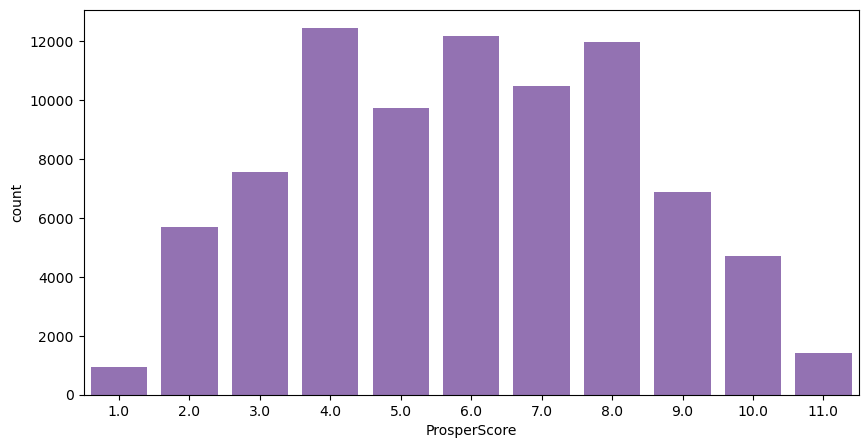

In [86]:
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[4]
sns.countplot(data=df, x='ProsperScore', color=base_color);

Prosper rating of 4,6,8,7 and 5 are the most popular. I would say Prosper uses a general prosper ratings of between 4-5 for their loan appraisals. The prosper score distribution is quite normal,and about the mean.

> **How are the loan repayment distribution?**

In [87]:
#But first let create a new column "satus" from loan status column that contains only loan status and not
#the substatuses of the loan classes using the 'lambda' function.
df['status'] = df['LoanStatus'].apply(lambda x:x.split()[0])
df.head()

/var/folders/lr/9d7qbckd3wz2lxschmvzbzcw0000gn/T/ipykernel_80344/1972544216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = df['LoanStatus'].apply(lambda x:x.split()[0])


ListingKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
1  10273602499503308B223C1    36    Current      0.12016        0.0920   
3  0EF5356002482715299901A    36    Current      0.12528        0.0974   
4  0F023589499656230C5E3E2    36    Current      0.24614        0.2085   
5  0F05359734824199381F61D    60    Current      0.15425        0.1314   
6  0F0A3576754255009D63151    36    Current      0.31032        0.2712   

   LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
1       0.0820                  0.07960         0.0249          0.05470   
3       0.0874                  0.08490         0.0249          0.06000   
4       0.1985                  0.18316         0.0925          0.09066   
5       0.1214                  0.11567         0.0449          0.07077   
6       0.2612                  0.23820         0.1275          0.11070   

   ProsperRating (numeric)  ... LP_CollectionFees  LP_GrossPrincipalLoss  \
1                      6.0  ...               0.0                    0.0   
3                      6.0  ...               0.0                    0.0   
4                      3.0  ...               0.0                    0.0   
5                      5.0  ...               0.0                    0.0   
6                      2.0  ...               0.0                    0.0   

   LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments PercentFunded  \
1                  0.0                             0.0           1.0   
3                  0.0                             0.0           1.0   
4                  0.0                             0.0           1.0   
5                  0.0                             0.0           1.0   
6                  0.0                             0.0           1.0   

  Recommendations  InvestmentFromFriendsCount  InvestmentFromFriendsAmount  \
1               0                           0                          0.0   
3               0                           0                          0.0   
4               0                           0                          0.0   
5               0                           0                          0.0   
6               0                           0                          0.0   

   Investors   status  
1          1  Current  
3        158  Current  
4         20  Current  
5          1  Current  
6          1  Current  

[5 rows x 72 columns]

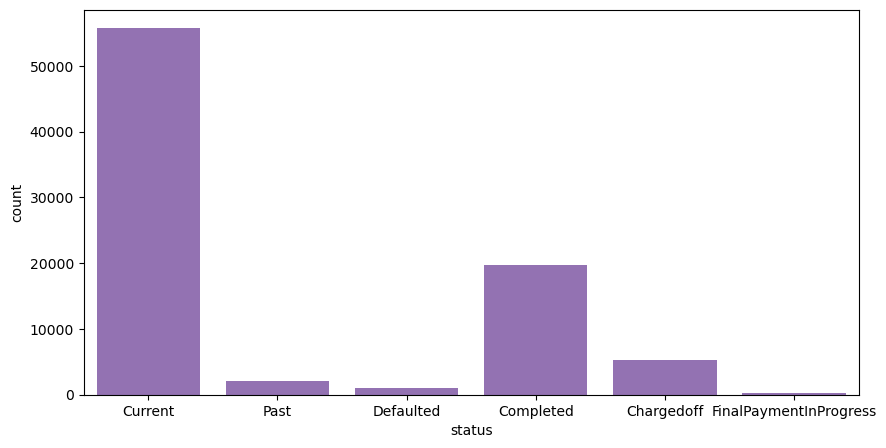

In [88]:
#a plot of loan status looks like this.
#now a blot of the distribution will look like this
plt.figure(figsize = [10, 5]) 
sns.countplot(data=df, x='status',color=base_color);

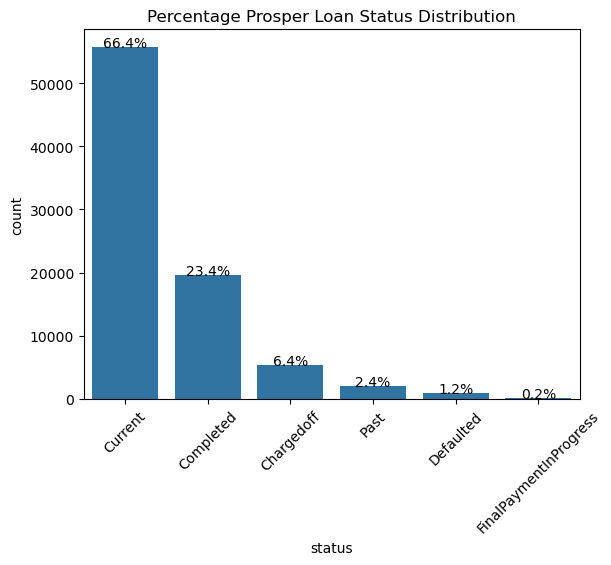

In [89]:
# Print the proportion below the bars and order the Status counts ascending
loan=df['status'].value_counts().sum()
status_count=df['status'].value_counts()
status_order=status_count.index
#set base colour and plot
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='status', color=base_color, order=status_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/loan)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    
plt.title('Percentage Prosper Loan Status Distribution');

Approximately 90% of the loans according to this study are good loans, either being paid or completed while 10% are bad loans, defaulted or charged off.

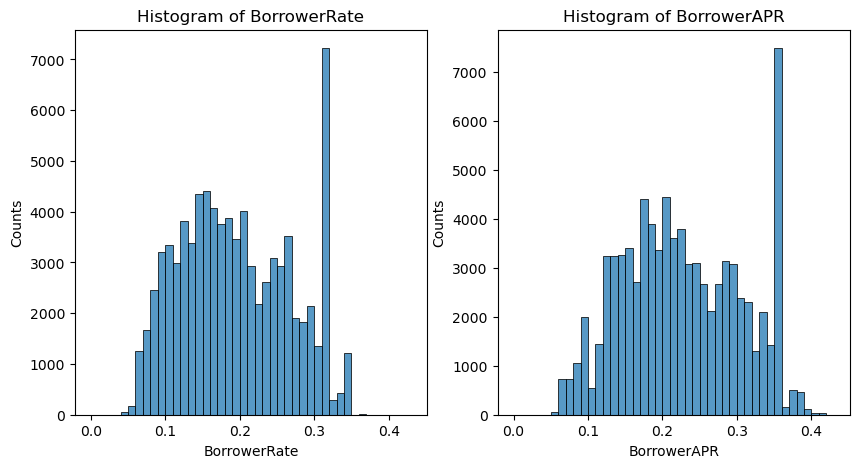

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

bin_edges = np.arange(0, df['BorrowerRate'].max()+0.01, 0.01)
bin_edges = np.arange(0, df['BorrowerAPR'].max()+0.01, 0.01)


# Plot the first histogram on the first subplot
sns.histplot(df['BorrowerRate'],bins=bin_edges, ax=axs[0])

# Plot the second histogram on the second subplot
sns.histplot(df['BorrowerAPR'],bins=bin_edges, ax=axs[1])

axs[1].set_xlim=(0.05,0.3)
axs[1].set_ylim=(0,5000)


# Add titles to the subplots
axs[0].set_title('Histogram of BorrowerRate')
axs[1].set_title('Histogram of BorrowerAPR')

# Add x-labels to the subplots
axs[0].set_xlabel('BorrowerRate')
axs[1].set_xlabel('BorrowerAPR')

# Add y-labels to the subplots
axs[0].set_ylabel('Counts')
axs[1].set_ylabel('Counts')

# Display the plot
plt.show()

>**Original loan amounts distribution**

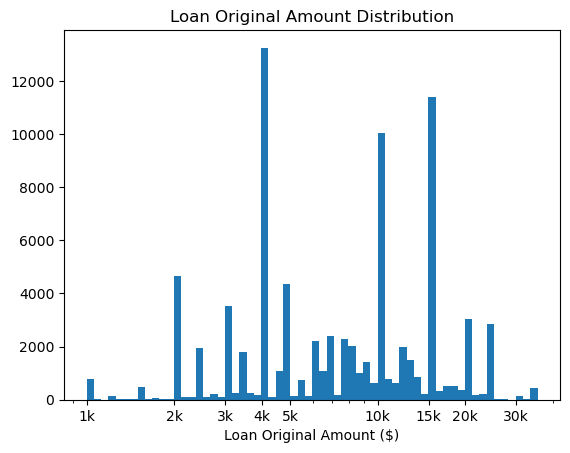

In [91]:
# Plot the loan original amount against a log scale because it has a long tail
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount Distribution');

Most people tend to borrow amounts at 4000$, 10000$ and 15000$ as shown with long bars. These are the most common among the clients.

>**The distribution of monthly incomes.**

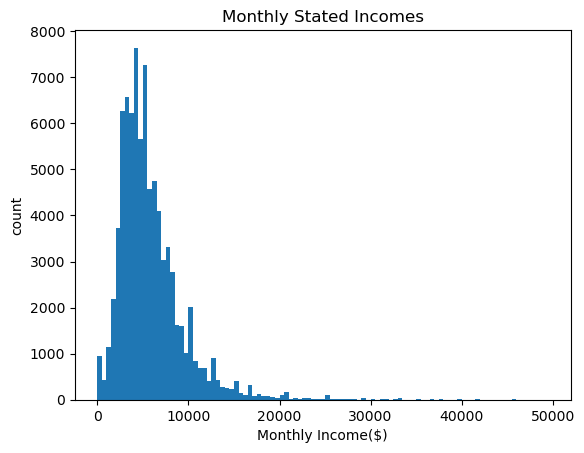

In [92]:
# Distribution of stated monthly income
bin_edges = np.arange(0, 50000, 500)
plt.xlabel('Monthly Income($)')
plt.ylabel('count')
plt.title('Monthly Stated Incomes')
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bin_edges);


The distribution of stated monthly income is severely right screwed

>**The distribution of Borrower interest Rates and Borrower APR.**

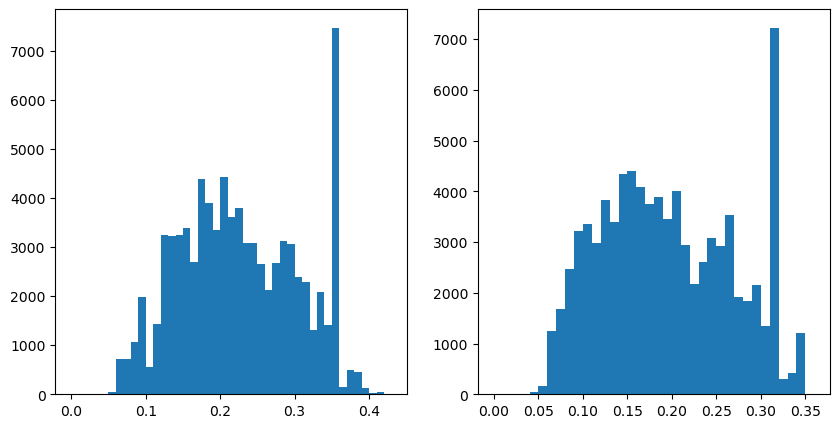

In [93]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [10, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, df['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data = df, x = 'BorrowerRate', bins = bins);


From the two distributions, we realise that the distributions of Interest Rate and Borrower APR from the Prosper are almost similar in shape. One could actually use the other, if that were possible.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Prosper rating of 4,6,8,7 and 5 are the most popular. I would say Prosper uses a general prosper ratings of between 4-5 for their loan appraisals.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> A part from the distributions of BorrowerAPR and BorrowerRate with a high peak of counts, the rest of the distributions had quite a good distributions and easy to understand.

## Bivariate Exploration

>**An investigation into the relationship between the Prosper ratings and different loan status.**

In [94]:
df.status.value_counts()

Current                   55730
Completed                 19651
Chargedoff                 5336
Past                       2057
Defaulted                  1005
FinalPaymentInProgress      203
Name: status, dtype: int64

In [95]:
# define the order of the categories
cat_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
# convert the column to a categorical data type with the specified order
df['ProsperRating (Alpha)'] = pd.Categorical(df['ProsperRating (Alpha)'], categories=cat_order, ordered=True)

/var/folders/lr/9d7qbckd3wz2lxschmvzbzcw0000gn/T/ipykernel_80344/3995286976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ProsperRating (Alpha)'] = pd.Categorical(df['ProsperRating (Alpha)'], categories=cat_order, ordered=True)


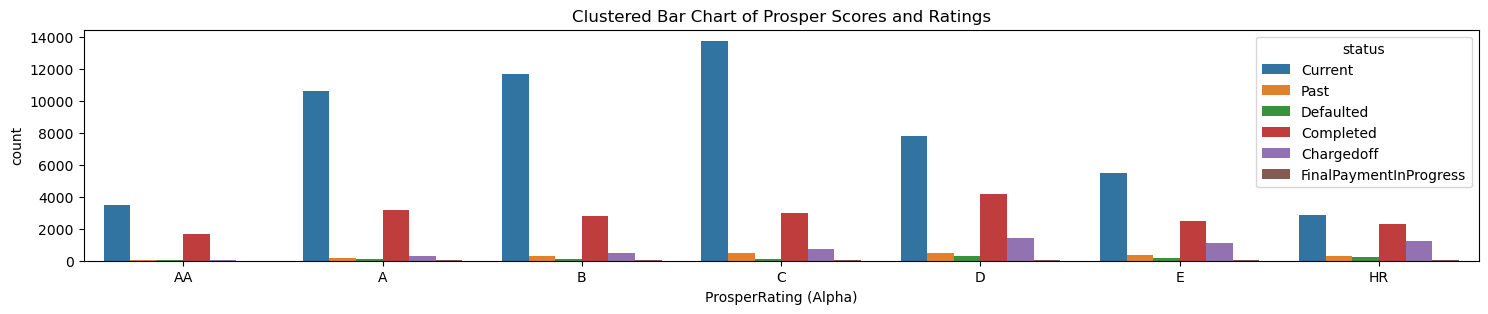

In [96]:
plt.figure(figsize = [18, 3]) 
plt.title('Clustered Bar Chart of Prosper Scores and Ratings')
sns.countplot(data=df, x='ProsperRating (Alpha)', hue='status');

When we compare the bars of completed loans agains defaulted and charged off, the latter seems of small amount. There seems to be a good number of loans being charged off.

>**How does the Borrower interests rates and BorrowerAPR varry with the loan terms?**

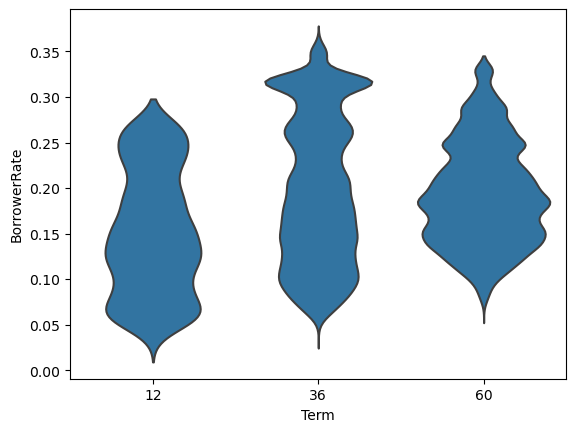

In [97]:
x_ticks = [12, 36, 60]
x_ticks_names = ['One Year', 'Three Years', 'Six Years']
plt.xticks(x_ticks, x_ticks_names)
sns.violinplot(df, x='Term', y='BorrowerRate', color=base_color, inner=None);


Longer repayment terms of 36 and 60 months tends to have higher interest rates as compared to loans of one year which generally starts at lower intersts too. i would say that lower terms tends to have lower risks hence lower interests charged. I would predict the same with the Borrower APR from the Prosper

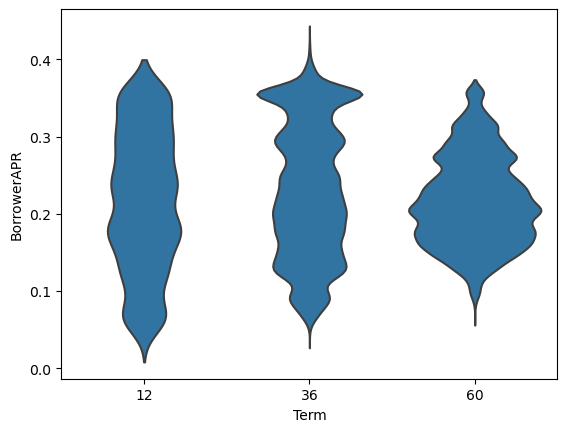

In [98]:
x_ticks = [12, 36, 60]
x_ticks_names = ['One Year', 'Three Years', 'Six Years']
plt.xticks(x_ticks, x_ticks_names)
sns.violinplot(df, x='Term', y='BorrowerAPR', color=base_color, inner=None);

Borrower APR given to 0ne year aand 36 month loans are actually higer and with a higer margin. For 60, The rates are quite distributed abouth the mean,high risk.

>**How is the correlation between the orinal loan and the monthly loan repayment?**

In [99]:
import seaborn as sns

#define a function that plots scatter of x and y

def scatter_plot(x, y, data):
    
  
    sns.scatterplot(x=x, y=y, data=data)


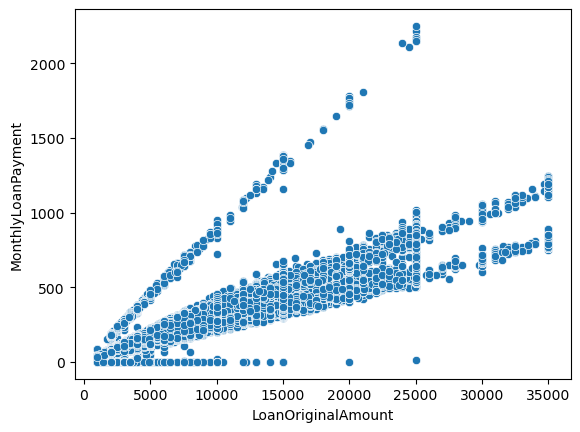

In [100]:
#call the plot
scatter_plot('LoanOriginalAmount', 'MonthlyLoanPayment', df)

There is no clear correlaton between the Original loan amount and monthly loan repayments.

>**The distribution of Borrower rate agains Prosper rating and loan terms.**

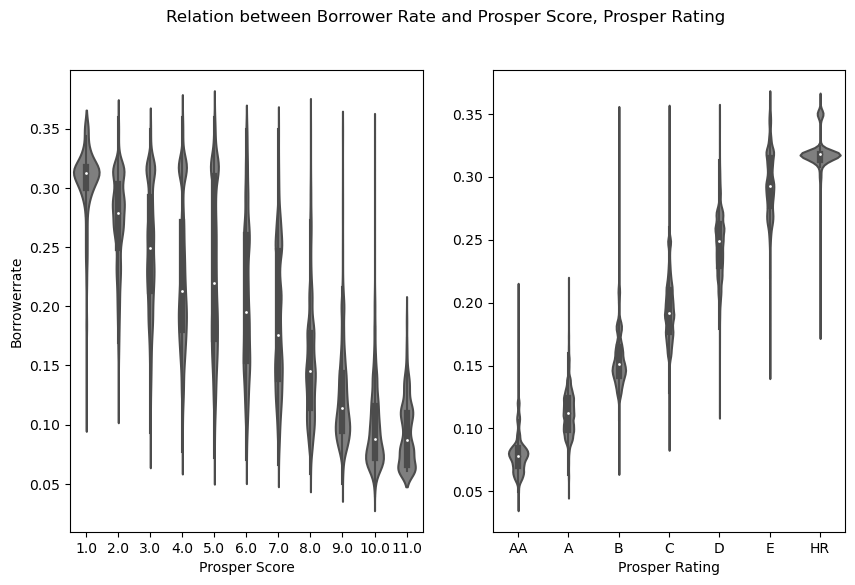

In [101]:
# function for plotting 
def violin(var, color):
    fig, ax = plt.subplots(ncols = 2, figsize = [10,6])
    sns.violinplot(data = df, y = var, x = 'ProsperScore', ax = ax[0],
                  color = color)
    ax[0].set_xlabel("Prosper Score")
    ax[0].set_ylabel(var.capitalize())
    sns.violinplot(data = df, y = var, x = 'ProsperRating (Alpha)', ax = ax[1],
               color = color)

    ax[1].set_xlabel("Prosper Rating")
    ax[1].set_ylabel("")
    fig.suptitle('Relation between Borrower Rate and Prosper Score, Prosper Rating')
    plt.show()
    
violin('BorrowerRate', sns.color_palette()[7])

There is a strong indication that the Prosper score is an excellent determinant factor of borrower's rate. We can conclude that the higher the score , the lower the rate. Similarly, borrowers with AA prosper ratings could expect an APR that is lower, whereas borrowers with bad ratings (HR) expect their interest rate to go even higher.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> With respect to Prosper scores or ratings as that is my main variable of interest, it is a main factor in determining the interest rates charged on the loans,whether high or lower. This is also evident in the amount of loans since amount of loans disbursed also correlated to the rates.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is actually no apparent correlation between loan amounts taken and monthly payments of the loans. 

## Multivariate Exploration

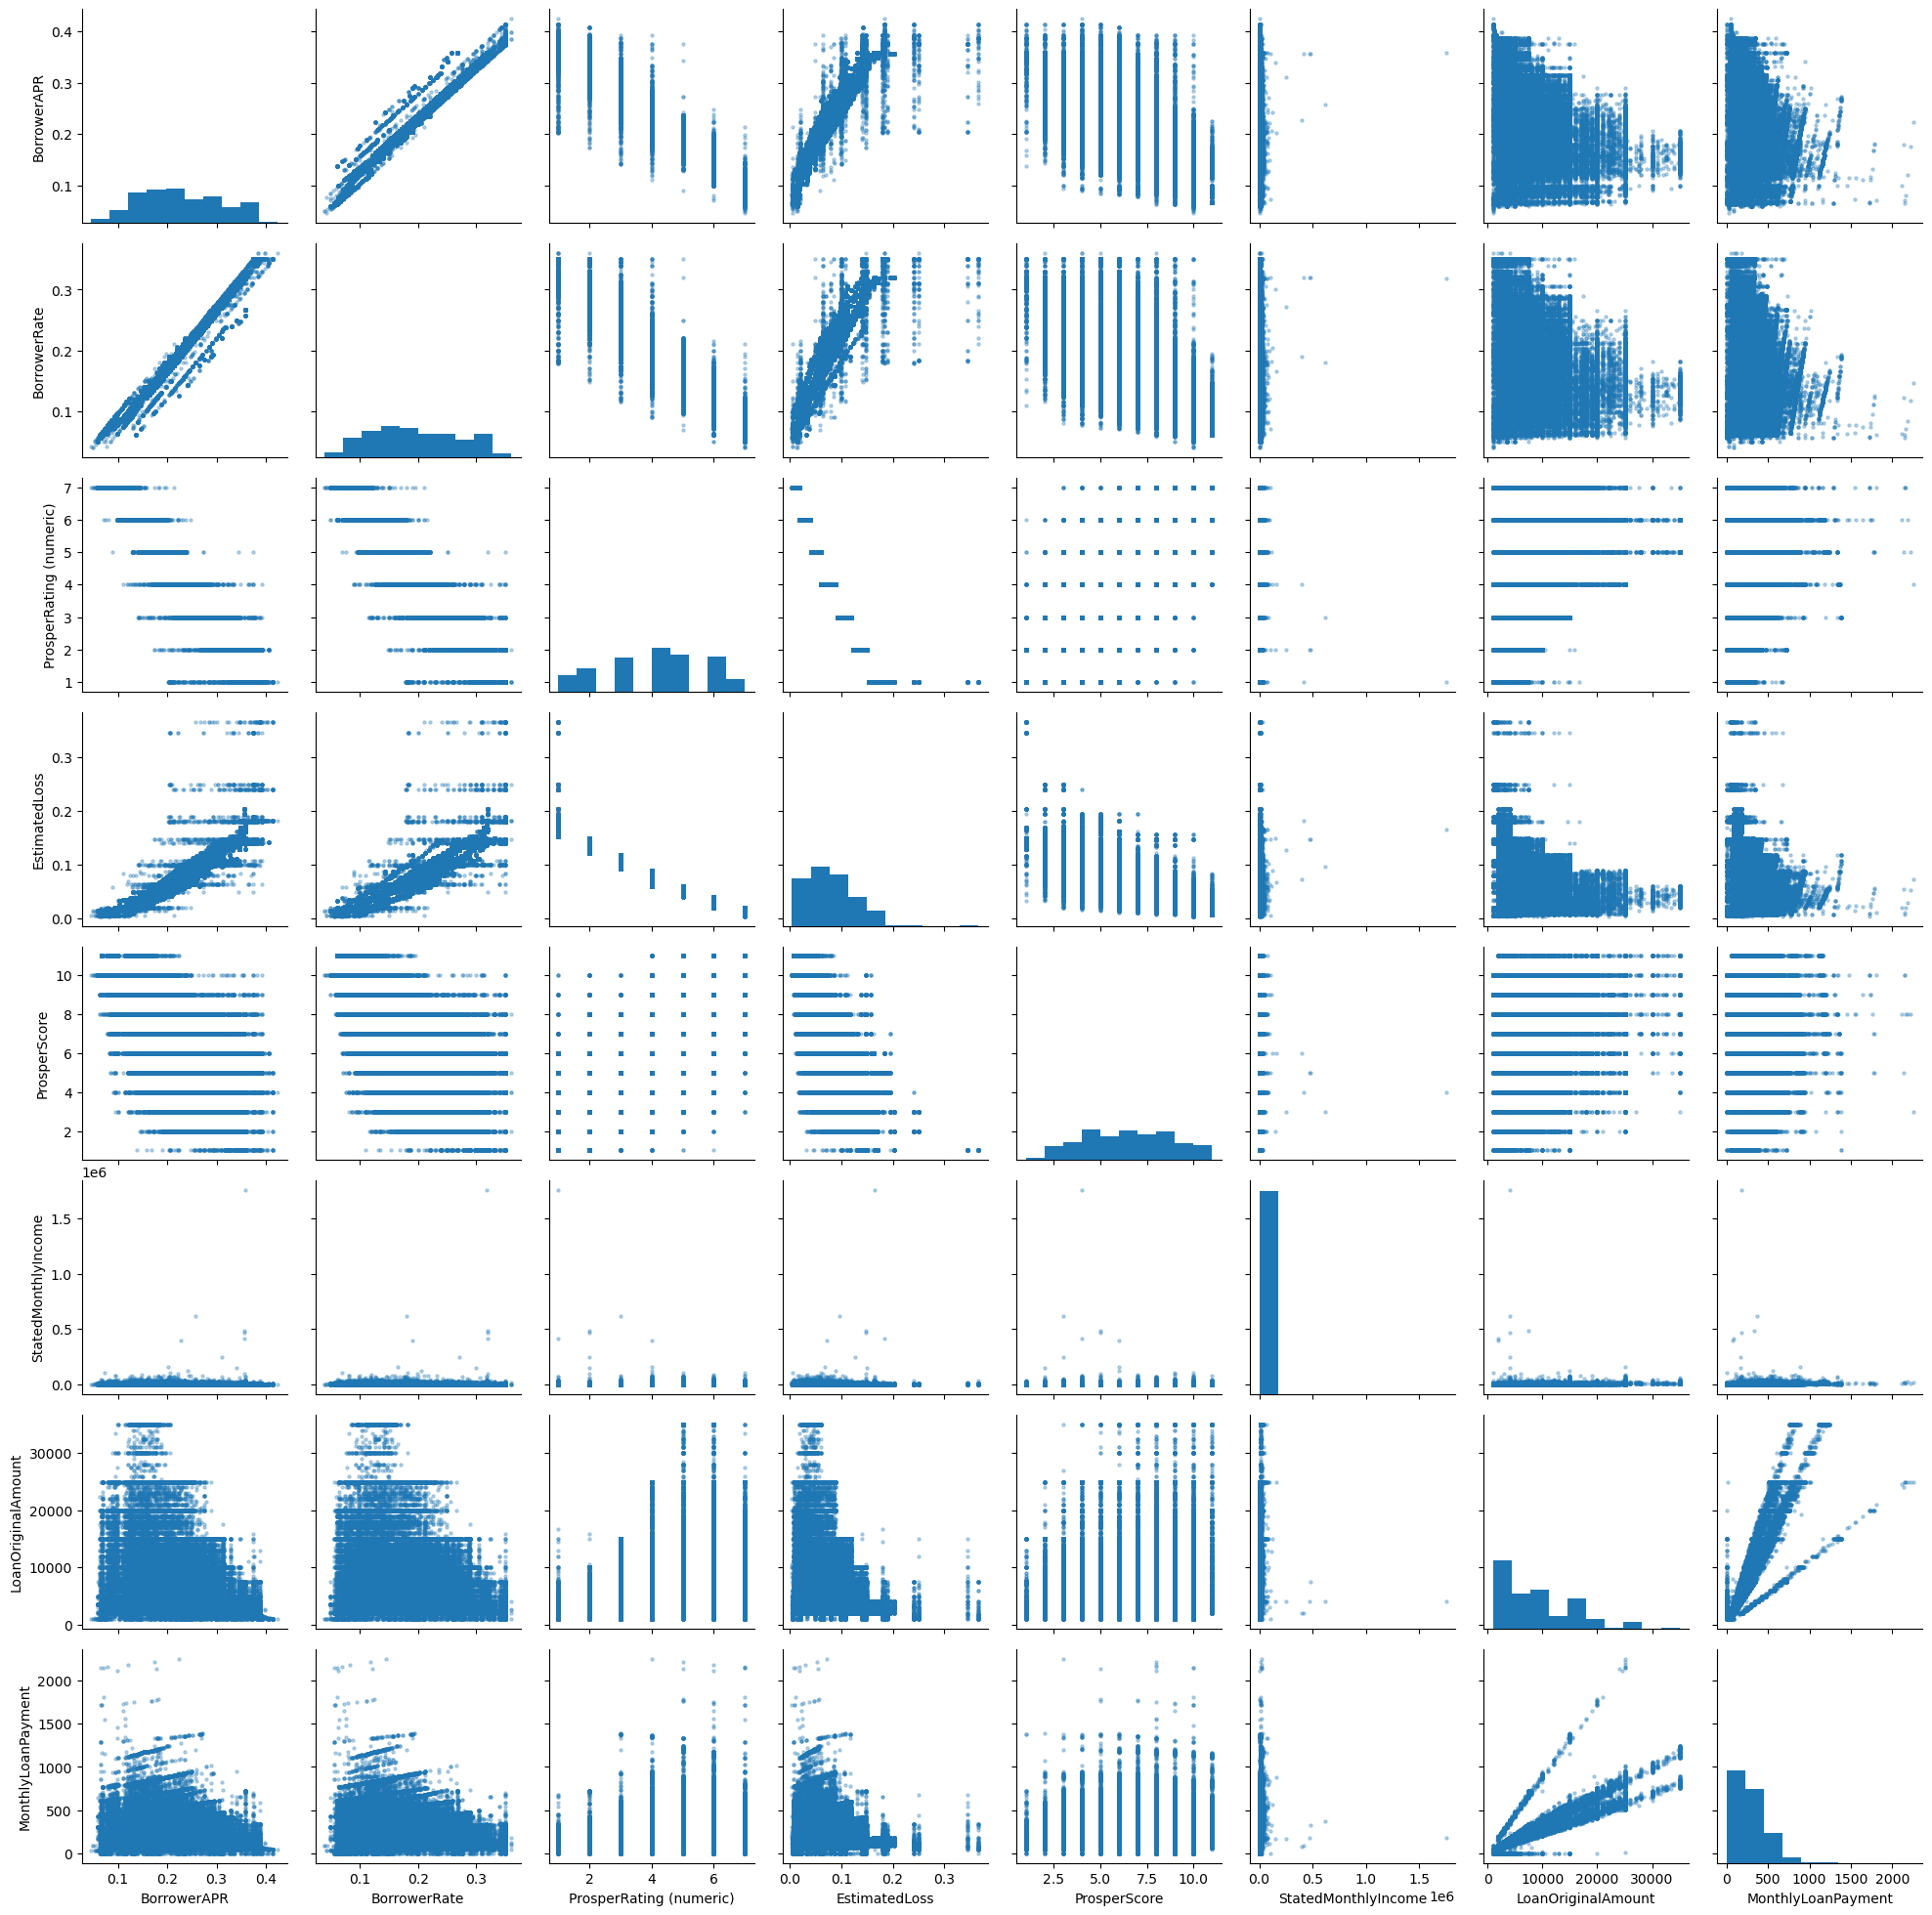

In [102]:
df_interests = ['BorrowerAPR','BorrowerRate','ProsperRating (numeric)','EstimatedLoss','ProsperScore',
                'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']
g = sns.PairGrid(data = df, vars = df_interests);
g.map_offdiag(plt.scatter, alpha=0.3, s=5);
g.map_diag(plt.hist);

>**A heatmap plot of the different variables**

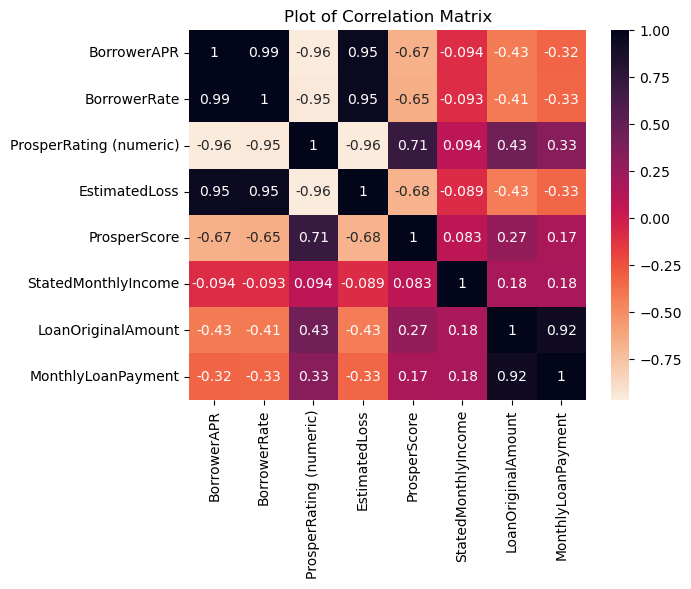

In [103]:
sns.heatmap(df[df_interests].corr(), cmap='rocket_r', annot=True);
plt.title('Plot of Correlation Matrix');

Prosper rating and estimated rating has a correlation r=-0.96, higher ratings means lower loss realised by the loans. This is a inverse in the correlation between the estimated loss and both Borrower Rate and Borrower APR as increase in the rates causing an increase in loss realised on the loans.

>**The plots of loan amount borrowed against employment status and whether the borrower is home owner or not**

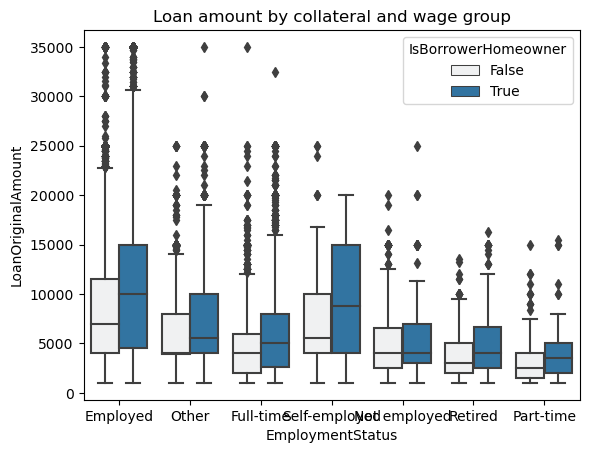

In [104]:
#plot boxplot
sns.boxplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount',
           hue = 'IsBorrowerHomeowner' ,color = base_color);
plt.title('Loan amount by collateral and wage group');

Loan amounts for employed and self employed are quite higher with Home owners taking much more than those with no homes. Retirees tends to take little home but generally owning a home guarantees much larger loans.

/var/folders/lr/9d7qbckd3wz2lxschmvzbzcw0000gn/T/ipykernel_80344/4048444181.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',


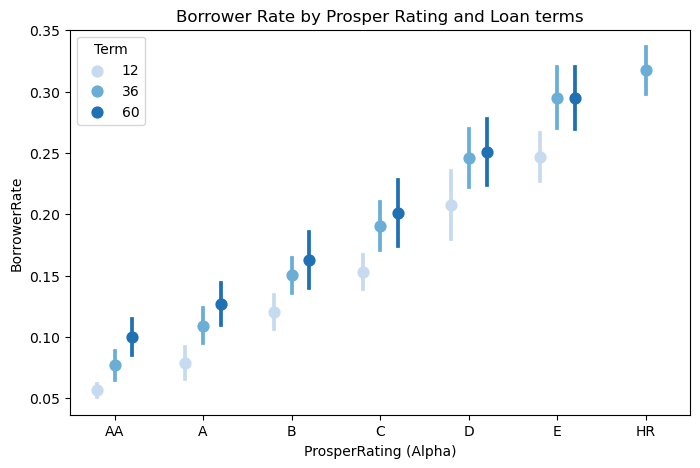

In [105]:
#plot pointplot 
fig = plt.figure(figsize = [8,5])
ax = sns.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '',dodge = 0.4, ci='sd')
plt.title('Borrower Rate by Prosper Rating and Loan terms');

The rates on a 5-year loans are generally higher than the rates applied on other maturities, regardless of the prosper rating. Increased duration increases rates. 

>**The distribution of income ranges against original loan amount borrowed and whether borrower is home owner or not.** 

In [106]:
df.IncomeRange.value_counts()

$50,000-74,999    25326
$25,000-49,999    23923
$100,000+         15056
$75,000-99,999    14362
$1-24,999          4621
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

/var/folders/lr/9d7qbckd3wz2lxschmvzbzcw0000gn/T/ipykernel_80344/1618051945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IncomeRange'] = pd.Categorical(df['IncomeRange'], categories=cat_order, ordered=True)


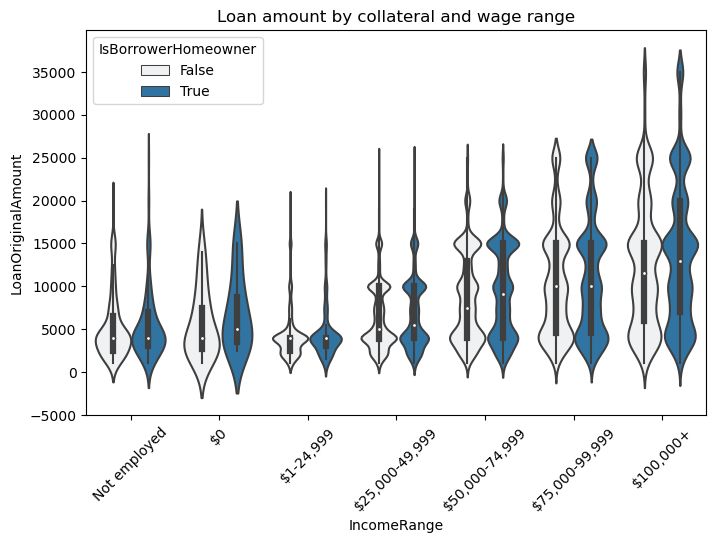

In [107]:
# define the order of the categories
cat_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
# convert the column to a categorical data type with the specified order
df['IncomeRange'] = pd.Categorical(df['IncomeRange'], categories=cat_order, ordered=True)

#plot boxplot
plt.figure(figsize = [8,5])
sns.violinplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount',
               hue = 'IsBorrowerHomeowner' ,color = base_color);
locs, labels = plt.xticks(rotation=45) 
plt.title('Loan amount by collateral and wage range');

The distribution of original loans taken against income ranges is pretty much the same for both home owners and non with higher loan amaounts going for ($100,000+)  income range and the least at ranges $1-24999. The higer the income range the higher the loan amount disbursed.

## Conclusions
The project had a dataset from Prosper.com which includes 81 variables and 113,937 entries. With such many variables it was hard to  get started without any financial knowledge. Thanks to Propers.com who  provided detailed description for each variable. So the first step before  conducting any data analysis is to understand the meaning of each variable.  After reading through the descriptions and definitions,  I chose ‘BorrowerRate’ as my target variable since this number matters  a lot to a potential borrower.

From the visualizations,being a home owner guarantees you higher loans and similar to being employed. Prosper scores actually plays a big role in what rates one gets. An indepth linear regressions and modelling is actually needed to coming up with these robust scores.


